# Logistic distribution simulation

In [1]:
library(evd)
library(maxstablePCA)
library(ggplot2)
library(dplyr)
library(GGally)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



### setup parameters and simulate data 

In [2]:
set.seed(180424)
s <- 100

In [3]:
X1 <- rmvevd(10000, dep = .2, model = "log", d = 5)
X2 <- rmvevd(10000, dep = .5, model = "log", d = 5)
X3 <- rmvevd(10000, dep = .8, model = "log", d = 5)

In [4]:
X1trafo <- transform_unitpareto(X1)
X2trafo <- transform_unitpareto(X2)
X3trafo <- transform_unitpareto(X3)

# max-stable PCA for X1

In [5]:
summary(apply(X1trafo, 1, max))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    1.004     1.577     2.545    13.033     5.274 10000.000 

In [6]:
length(which(apply(X1trafo, 1, max) > s))

[1] 138

In [7]:
maxPCAX1P1 <- max_stable_prcomp(X1trafo, p = 1, s = s, n_initial_guesses = 15000, norm = "linfty")
maxPCAX1P2 <- max_stable_prcomp(X1trafo, p = 2, s = s, n_initial_guesses = 15000, norm = "linfty")
maxPCAX1P3 <- max_stable_prcomp(X1trafo, p = 3, s = s, n_initial_guesses = 15000, norm = "linfty")
maxPCAX1P4 <- max_stable_prcomp(X1trafo, p = 4, s = s, n_initial_guesses = 15000, norm = "linfty")

In [8]:
maxPCAX1P3

$p
[1] 3

$d
[1] 5

$decoder_matrix
          [,1]      [,2]      [,3]
[1,] 1.2259495 0.3386254 0.2152784
[2,] 0.1905930 0.1778669 1.0835299
[3,] 0.3598006 1.0707083 0.7151039
[4,] 0.9158107 0.8390863 0.8772472
[5,] 0.1945241 1.1827976 0.3494505

$encoder_matrix
          [,1]      [,2]      [,3]      [,4]      [,5]
[1,] 0.8156917 0.1346598 0.1796936 0.2370620 0.1445028
[2,] 0.1322362 0.2167687 0.4218422 0.1118411 0.8454534
[3,] 0.1140770 0.9229008 0.1240546 0.2153098 0.1799514

$reconstr_matrix
          [,1]      [,2]      [,3]      [,4]      [,5]
[1,] 0.9999968 0.1986806 0.2202952 0.2906261 0.2862920
[2,] 0.1554651 0.9999906 0.1344169 0.2332946 0.1949827
[3,] 0.2934863 0.6599700 0.4516700 0.1539689 0.9052340
[4,] 0.7470192 0.8096121 0.3539621 0.2171039 0.7094084
[5,] 0.1586717 0.3225082 0.4989540 0.1322854 1.0000003

$loss_fctn_value
[1] 0.5676394

$optim_conv_status
[1] 4

$s
[1] 100

$starting_vals
$starting_vals$decoder_matrix_x0
          [,1]      [,2]      [,3]
[1,] 1.0000000 

In [9]:
round(maxPCAX1P3$decoder_matrix, 2)

1.23,0.34,0.22
0.19,0.18,1.08
0.36,1.07,0.72
0.92,0.84,0.88
0.19,1.18,0.35


In [10]:
round(maxPCAX1P3$encoder_matrix, 2)

0.82,0.13,0.18,0.24,0.14
0.13,0.22,0.42,0.11,0.85
0.11,0.92,0.12,0.22,0.18


In [11]:
round(maxPCAX1P3$reconstr_matrix, 2)

1.00,0.20,0.22,0.29,0.29
0.16,1.00,0.13,0.23,0.19
0.29,0.66,0.45,0.15,0.91
0.75,0.81,0.35,0.22,0.71
0.16,0.32,0.50,0.13,1.00


#### rescale the matrices such that the largest rowwise entries of $\hat W$ are equal to one

In [12]:
round(maxmatmul(maxPCAX1P3$decoder_matrix, diag(apply(maxPCAX1P3$encoder_matrix, 1, max))), 2)

1.00,0.29,0.20
0.16,0.15,1.00
0.29,0.91,0.66
0.75,0.71,0.81
0.16,1.00,0.32


In [13]:
round(t(apply(maxPCAX1P3$encoder_matrix, 1, function(z) z / max(z))), 2)

1.00,0.17,0.22,0.29,0.18
0.16,0.26,0.50,0.13,1.00
0.12,1.00,0.13,0.23,0.19


In [14]:
maxPCAX1P1$loss_fctn_value

[1] 1.11329

### elbow plot and pairplot to visually inspect fit

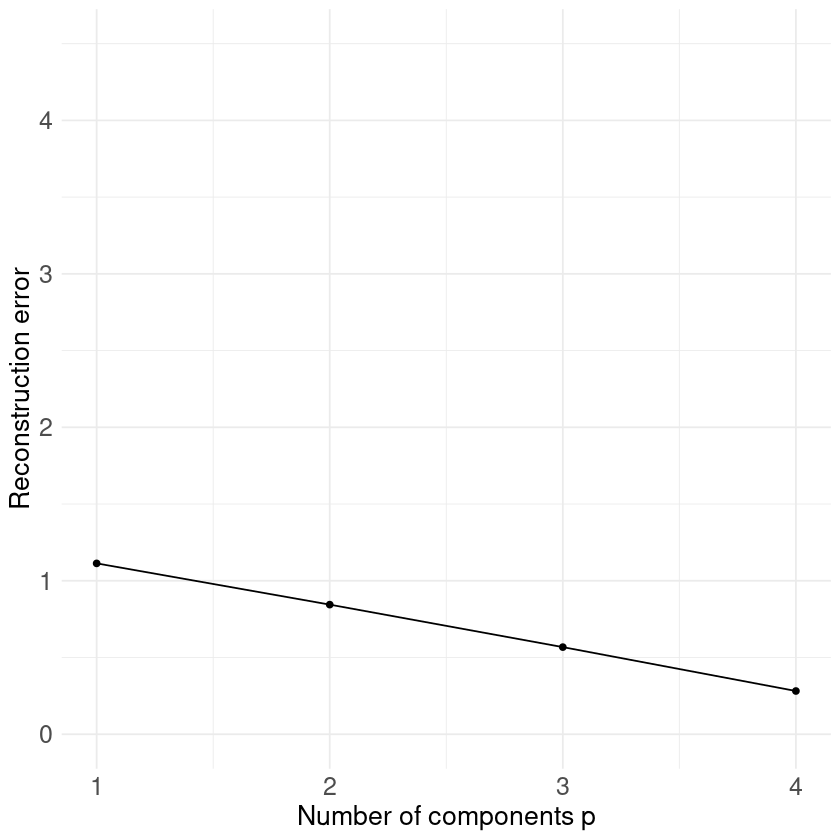

In [15]:
plotlossdatX1 <- data.frame(
    p = 1:4, 
    loss = c(
        maxPCAX1P1$loss_fctn_value, 
        maxPCAX1P2$loss_fctn_value, 
        maxPCAX1P3$loss_fctn_value, 
        maxPCAX1P4$loss_fctn_value

    )
)

pe1 <- ggplot(aes(x = p, y = loss), data = plotlossdatX1) + 
geom_line() + 
geom_point() + 
ylim(0,4.5) + 
ylab("Reconstruction error") + 
xlab("Number of components p") + 
theme_minimal() + 
theme(
    axis.title = element_text(size = 16),
    axis.text.x = element_text(size = 15),
    axis.text.y = element_text(size = 15)
)

pe1

In [16]:
ggsave("logistic_dephigh_elbow.pdf", pe1)

Saving 7 x 7 in image


In [17]:
rec1 <- t(maxmatmul(maxPCAX1P3$reconstr_matrix, t(exp(X1))))

In [18]:
datX1 <- data.frame(exp(X1))
datX1$is_rec = "original"
datrec1 <- data.frame(rec1)
datrec1$is_rec = "reconstruction"
names(datrec1) <- names(datX1)
plot_datX1 <- full_join(datX1, datrec1)

Joining with `by = join_by(X1, X2, X3, X4, X5, is_rec)`


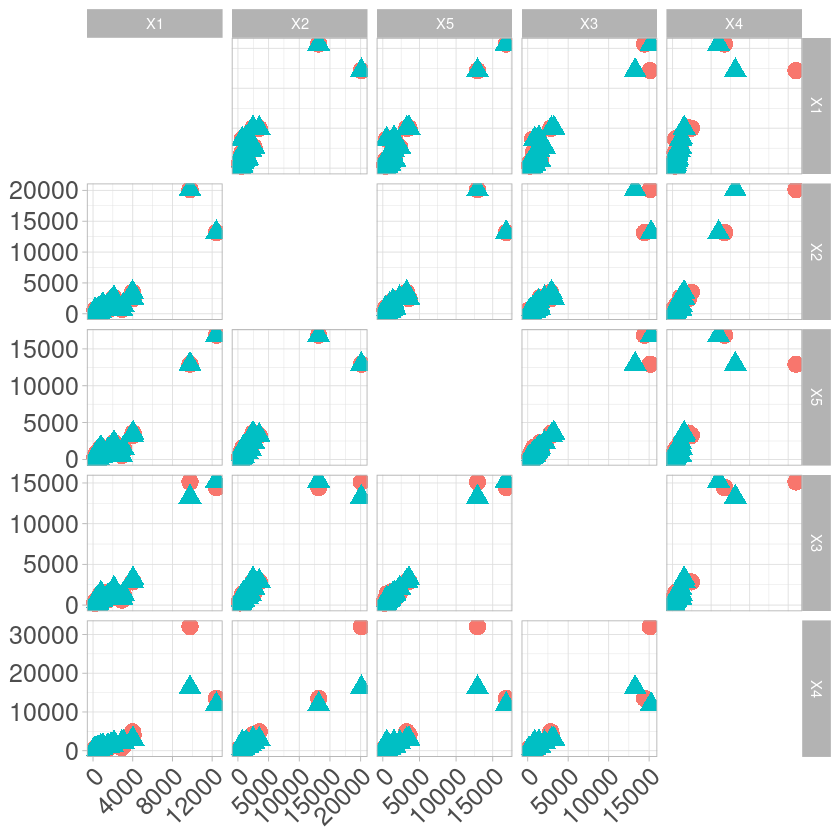

In [19]:
p1 <- ggpairs(
    plot_datX1, 
    aes(color = is_rec, shape = is_rec, size = 2),
    columns = c(1,2,5,3,4),
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_light() +
  theme(
    axis.text.x = element_text(size = 15),
    axis.text.y = element_text(size = 15)
  ) + 
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

p1

In [20]:
ggsave("logistic_dephigh.png", p1)

Saving 7 x 7 in image


# Max-stable PCA for X2

In [21]:
length(which(apply(X2trafo, 1, max) > s))

[1] 225

In [22]:
maxPCAX2P1 <- max_stable_prcomp(X2trafo, p = 1, s = s, n_initial_guesses = 15000, norm = "linfty")
maxPCAX2P2 <- max_stable_prcomp(X2trafo, p = 2, s = s, n_initial_guesses = 15000, norm = "linfty")
maxPCAX2P3 <- max_stable_prcomp(X2trafo, p = 3, s = s, n_initial_guesses = 15000, norm = "linfty")
maxPCAX2P4 <- max_stable_prcomp(X2trafo, p = 4, s = s, n_initial_guesses = 15000, norm = "linfty")

In [23]:
maxPCAX2P3

$p
[1] 3

$d
[1] 5

$decoder_matrix
            [,1]        [,2]        [,3]
[1,] 0.006375097 0.004294031 1.053848949
[2,] 1.328524274 0.001141440 0.009084926
[3,] 0.529617440 0.237286564 0.580449861
[4,] 0.637281037 0.441794716 0.109611892
[5,] 0.007993694 1.706266172 0.004486715

$encoder_matrix
            [,1]        [,2]        [,3]        [,4]        [,5]
[1,] 0.002140774 0.752668786 0.011547330 0.003068910 0.004617031
[2,] 0.004973648 0.003689665 0.004317807 0.005696903 0.586070264
[3,] 0.948906123 0.002333537 0.011467566 0.008919177 0.001351900

$reconstr_matrix
            [,1]        [,2]        [,3]        [,4]        [,5]
[1,] 1.000003721 0.004798336 0.012085083 0.009399466 0.002516604
[2,] 0.008620742 0.999938753 0.015340908 0.004077122 0.006133838
[3,] 0.550792428 0.398626516 0.006656347 0.005177135 0.139066599
[4,] 0.104011396 0.479661545 0.007358895 0.002516862 0.258922745
[5,] 0.008486367 0.006295550 0.007367328 0.009720433 0.999991865

$loss_fctn_value
[1] 1.462209

$

In [24]:
round(maxPCAX2P3$decoder_matrix, 2)

0.01,0.00,1.05
1.33,0.00,0.01
0.53,0.24,0.58
0.64,0.44,0.11
0.01,1.71,0.00


In [25]:
round(maxPCAX2P3$encoder_matrix, 2)

0.00,0.75,0.01,0.00,0.00
0.00,0.00,0.00,0.01,0.59
0.95,0.00,0.01,0.01,0.00


In [26]:
round(maxPCAX2P3$reconstr_matrix, 2)

1.00,0.00,0.01,0.01,0.00
0.01,1.00,0.02,0.00,0.01
0.55,0.40,0.01,0.01,0.14
0.10,0.48,0.01,0.00,0.26
0.01,0.01,0.01,0.01,1.00


#### rescale the matrices such that the largest rowwise entries of $\hat W$ are equal to one

In [27]:
round(maxmatmul(maxPCAX2P3$decoder_matrix, diag(apply(maxPCAX2P3$encoder_matrix, 1, max))), 2)

0.00,0.00,1.00
1.00,0.00,0.01
0.40,0.14,0.55
0.48,0.26,0.10
0.01,1.00,0.00


In [28]:
round(t(apply(maxPCAX2P3$encoder_matrix, 1, function(z) z / max(z))), 2)

0.00,1.00,0.02,0.00,0.01
0.01,0.01,0.01,0.01,1.00
1.00,0.00,0.01,0.01,0.00


### elbow plot and pairplot to visually inspect fit

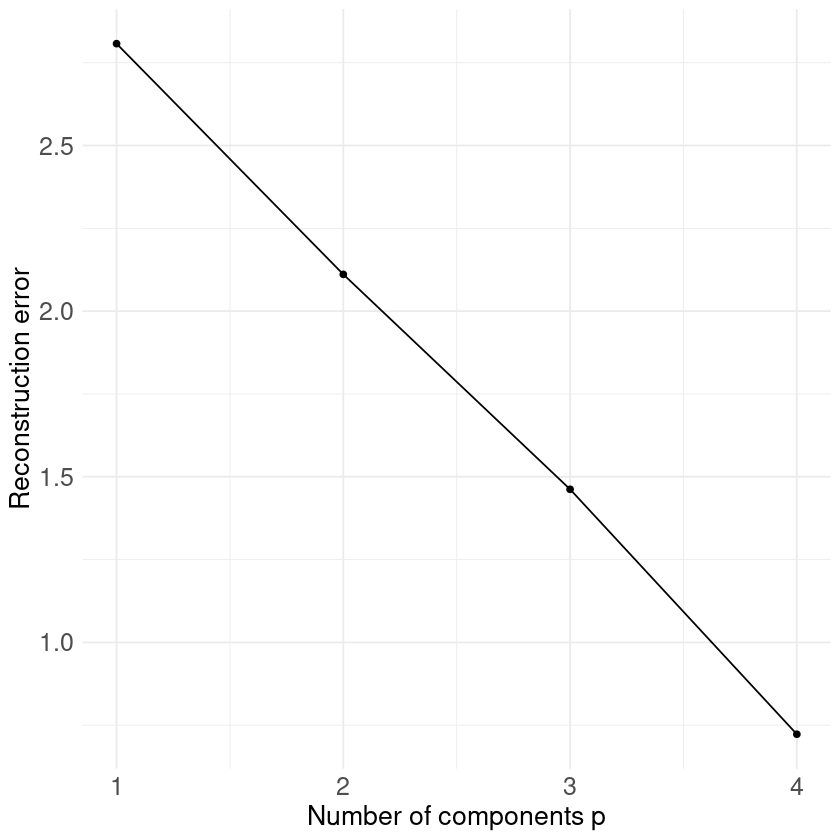

In [29]:
plotlossdatX2 <- data.frame(
    p = 1:4, 
    loss = c(
        maxPCAX2P1$loss_fctn_value,
        maxPCAX2P2$loss_fctn_value,
        maxPCAX2P3$loss_fctn_value,
        maxPCAX2P4$loss_fctn_value

    )
)

pe2 <- ggplot(aes(x = p, y = loss),  data = plotlossdatX2) + 
geom_line() + 
geom_point() + 
ylab("Reconstruction error") + 
xlab("Number of components p") + 
theme_minimal() + 
theme(
    axis.title = element_text(size = 16),
    axis.text.x = element_text(size = 15),
    axis.text.y = element_text(size = 15)
)

pe2

In [30]:
ggsave("logistic_depmed_elbow.pdf", pe2)

Saving 7 x 7 in image


In [31]:
rec2 <- t(maxmatmul(maxPCAX2P3$reconstr_matrix, t(exp(X2))))

In [32]:
datX2 <- data.frame(exp(X2))
datX2$is_rec = "original"
datrec2 <- data.frame(rec2)
datrec2$is_rec = "reconstruction"
names(datrec2) <- names(datX2)
plot_datX2 <- full_join(datX2, datrec2)

Joining with `by = join_by(X1, X2, X3, X4, X5, is_rec)`


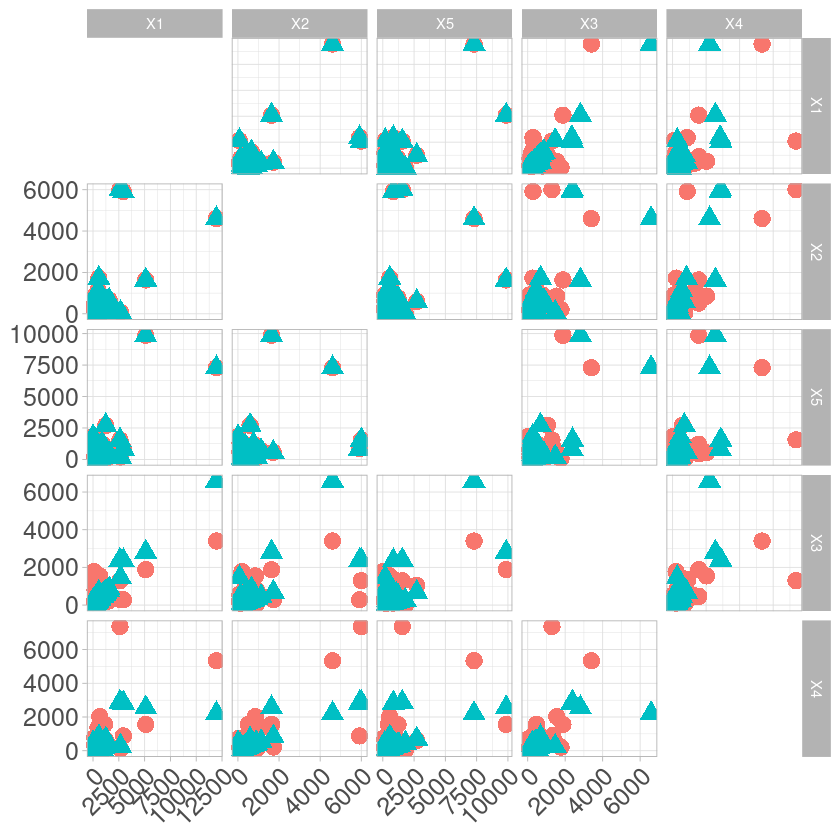

In [33]:
p2 <- ggpairs(
    plot_datX2, 
    aes(color = is_rec, shape = is_rec, size = 2),
    columns = c(1,2,5,3,4),
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_light() +
  theme(
    axis.text.x = element_text(size = 15),
    axis.text.y = element_text(size = 15)
  ) + 
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

p2

In [34]:
ggsave("logistic_depmed.png", p2)

Saving 7 x 7 in image


# Same for X3

In [35]:
length(which(apply(X3trafo, 1, max) > s))

[1] 356

In [36]:
maxPCAX3P1 <- max_stable_prcomp(X3trafo, p = 1, s = s, n_initial_guesses = 15000, norm = "linfty")
maxPCAX3P2 <- max_stable_prcomp(X3trafo, p = 2, s = s, n_initial_guesses = 15000, norm = "linfty")
maxPCAX3P3 <- max_stable_prcomp(X3trafo, p = 3, s = s, n_initial_guesses = 15000, norm = "linfty")
maxPCAX3P4 <- max_stable_prcomp(X3trafo, p = 4, s = s, n_initial_guesses = 15000, norm = "linfty")

In [37]:
maxPCAX3P3

$p
[1] 3

$d
[1] 5

$decoder_matrix
            [,1]         [,2]        [,3]
[1,] 0.150401953 1.258429e-01 0.018583221
[2,] 1.669277362 4.786831e-18 0.003977001
[3,] 0.133365348 8.941051e-02 0.028091746
[4,] 0.002260317 1.451681e+00 0.003320241
[5,] 0.002445769 1.035458e-03 1.498590566

$encoder_matrix
             [,1]         [,2]         [,3]         [,4]         [,5]
[1,] 0.0014703304 5.990663e-01 0.0033174138 0.0004346622 0.0002790334
[2,] 0.0001808305 8.029398e-18 0.0012500828 0.6888572700 0.0013243908
[3,] 0.0004984025 2.975040e-03 0.0007078408 0.0029820324 0.6674832248

$reconstr_matrix
             [,1]        [,2]         [,3]         [,4]        [,5]
[1,] 0.0002211406 0.090100747 0.0004989455 0.0866878159 0.012403989
[2,] 0.0024543892 1.000007872 0.0055376837 0.0007255718 0.002654581
[3,] 0.0001960911 0.079894690 0.0004424280 0.0615910786 0.018750769
[4,] 0.0002625081 0.001354080 0.0018147211 1.0000008171 0.002216205
[5,] 0.0007469012 0.004458367 0.0010607635 0.0044688457 1

In [38]:
round(maxPCAX3P3$decoder_matrix, 2)

0.15,0.13,0.02
1.67,0.00,0.00
0.13,0.09,0.03
0.00,1.45,0.00
0.00,0.00,1.50


In [39]:
round(maxPCAX3P3$encoder_matrix, 2)

0,0.6,0,0.00,0.00
0,0.0,0,0.69,0.00
0,0.0,0,0.00,0.67


In [40]:
round(maxPCAX3P3$reconstr_matrix, 2)

0,0.09,0.00,0.09,0.01
0,1.00,0.01,0.00,0.00
0,0.08,0.00,0.06,0.02
0,0.00,0.00,1.00,0.00
0,0.00,0.00,0.00,1.00


#### rescale the matrices such that the largest rowwise entries of $\hat W$ are equal to one

In [41]:
round(maxmatmul(maxPCAX3P3$decoder_matrix, diag(apply(maxPCAX3P3$encoder_matrix, 1, max))), 2)

0.09,0.09,0.01
1.00,0.00,0.00
0.08,0.06,0.02
0.00,1.00,0.00
0.00,0.00,1.00


In [42]:
round(t(apply(maxPCAX3P3$encoder_matrix, 1, function(z) z / max(z))), 2)

0,1,0.01,0,0
0,0,0.00,1,0
0,0,0.00,0,1


### elbow plot and pairplot to visually inspect fit

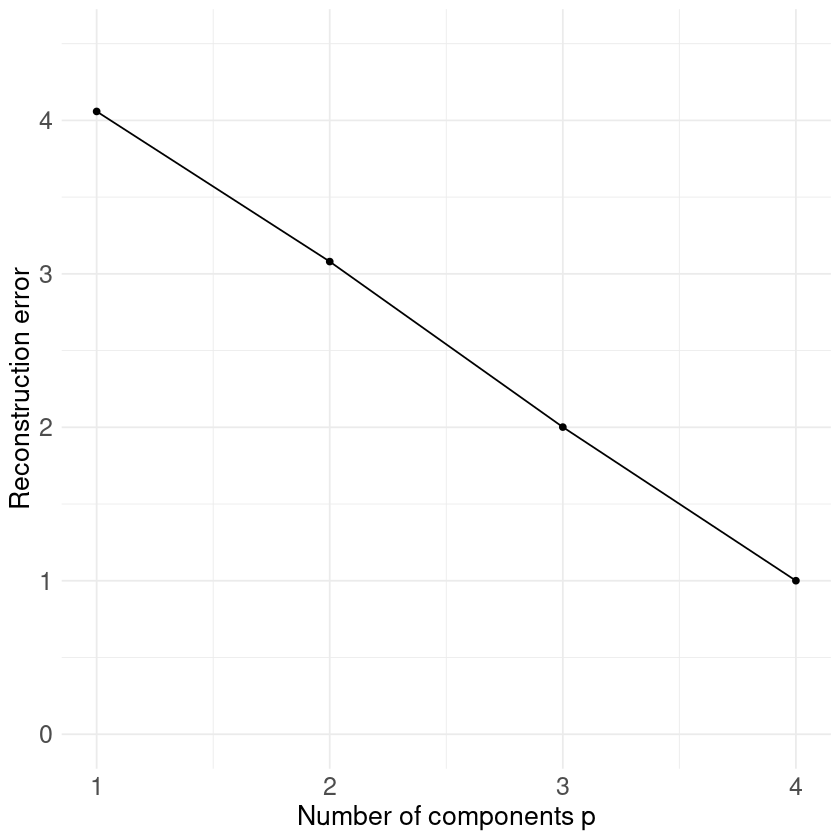

In [43]:
plotlossdatX3 <- data.frame(
    p = 1:4, 
    loss = c(
        maxPCAX3P1$loss_fctn_value,
        maxPCAX3P2$loss_fctn_value,
        maxPCAX3P3$loss_fctn_value,
        maxPCAX3P4$loss_fctn_value

    )
)

pe3 <- ggplot(aes(x = p, y = loss),  data = plotlossdatX3) + 
geom_line() + 
geom_point() + 
ylim(0,4.5) + 
ylab("Reconstruction error") + 
xlab("Number of components p") + 
theme_minimal() + 
theme(
    axis.title = element_text(size = 16),
    axis.text.x = element_text(size = 15),
    axis.text.y = element_text(size = 15)
)

pe3

In [44]:
ggsave("logistic_deplow_elbow.pdf", pe3)

Saving 7 x 7 in image


In [45]:
rec3 <- t(maxmatmul(maxPCAX3P3$reconstr_matrix, t(exp(X3))))

In [46]:
datX3 <- data.frame(exp(X3))
datX3$is_rec = "original"
datrec3 <- data.frame(rec3)
datrec3$is_rec = "reconstruction"
names(datrec3) <- names(datX3)
plot_datX3 <- full_join(datX3, datrec3)

Joining with `by = join_by(X1, X2, X3, X4, X5, is_rec)`


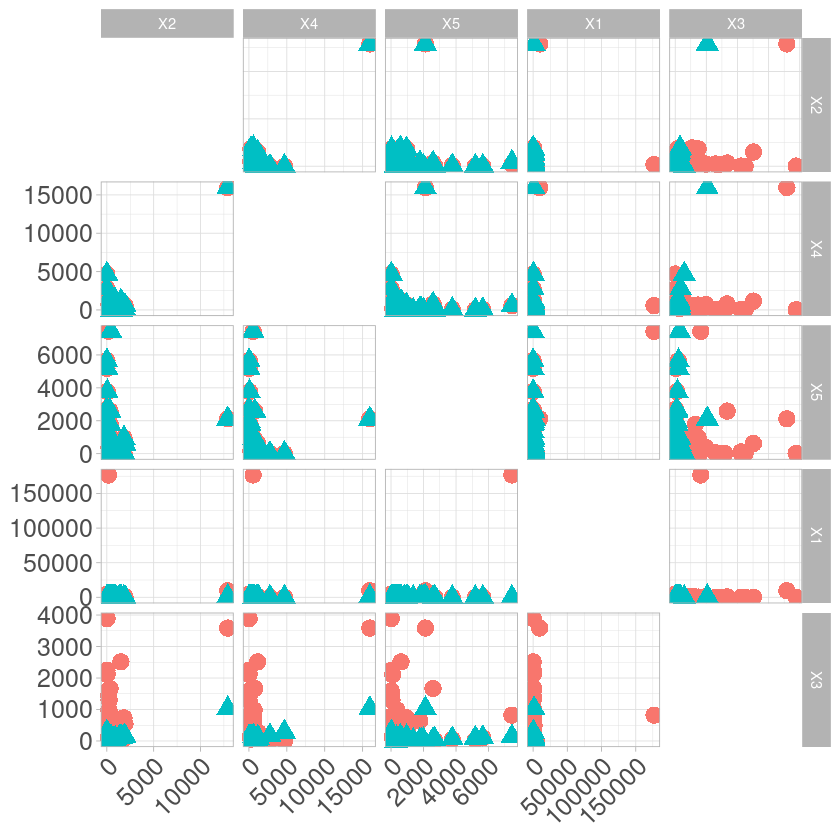

In [47]:
p3 <- ggpairs(
    plot_datX3, 
    aes(color = is_rec, shape = is_rec, size = 2),
    columns = c(2,4,5,1,3),
    upper = list(continuous = "points", combo = "dot_no_facet"),
    diag = list(continuous = "blankDiag", discrete = "barDiag", na = "naDiag")
) + 
theme_light() +
  theme(
    axis.text.x = element_text(size = 15),
    axis.text.y = element_text(size = 15)
  ) + 
theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust=1))

p3

In [48]:
ggsave("logistic_deplow.png", p3)

Saving 7 x 7 in image
